In [241]:
import cfgrib
import xarray as xr
import iris
import numpy as np
import matplotlib.pyplot as plt

In [178]:
variables = ['air', 'hgt', 'rhum', 'uwnd', 'vwnd']

In [179]:
def grbvar2ncvar(grib_var):
    if grib_var == 'Temperature':
        return 'air'
    elif grib_var == 'U component of wind':
        return 'uwnd'
    elif grib_var == 'V component of wind':
        return 'vwnd'
    elif grib_var == 'Relative humidity':
        return 'rhum'
    elif grib_var == 'Geopotential height':
        return 'hgt'
    else:
        return None
def ncvar2grbvar(grib_var):
    if grib_var == 'air':
        return 'Temperature'
    elif grib_var == 'uwnd':
        return 'U component of wind'
    elif grib_var == 'vwnd':
        return 'V component of wind'
    elif grib_var == 'rhum':
        return 'Relative humidity'
    elif grib_var == 'hgt':
        return 'Geopotential height'
    else:
        return None

In [180]:
def read_grib2(path:str, var:str):
    return xr.load_dataset(path, engine='cfgrib', filter_by_keys={'typeOfLevel': 'isobaricInhPa','name':ncvar2grbvar(var)})

In [181]:
def grb2nc(xr_grb, path_to:str):
    return xr_grb.to_netcdf(path=path_to)

In [190]:
def read_nc(path:str):
    return iris.load_cube(path)

In [228]:
def select_data(nc_grid):
    query = iris.Constraint(air_pressure = lambda cell: cell == 925)
    return nc_grid.extract(query)

In [199]:
lats = np.array([ 90.,  89.,  88.,  87.,  86.,  85.,  84.,  83.,  82.,  81.,  80.,
        79.,  78.,  77.,  76.,  75.,  74.,  73.,  72.,  71.,  70.,  69.,
        68.,  67.,  66.,  65.,  64.,  63.,  62.,  61.,  60.,  59.,  58.,
        57.,  56.,  55.,  54.,  53.,  52.,  51.,  50.,  49.,  48.,  47.,
        46.,  45.,  44.,  43.,  42.,  41.,  40.,  39.,  38.,  37.,  36.,
        35.,  34.,  33.,  32.,  31.,  30.,  29.,  28.,  27.,  26.,  25.,
        24.,  23.,  22.,  21.,  20.,  19.,  18.,  17.,  16.,  15.,  14.,
        13.,  12.,  11.,  10.,   9.,   8.,   7.,   6.,   5.,   4.,   3.,
         2.,   1.,   0.,  -1.,  -2.,  -3.,  -4.,  -5.,  -6.,  -7.,  -8.,
        -9., -10., -11., -12., -13., -14., -15., -16., -17., -18., -19.,
       -20., -21., -22., -23., -24., -25., -26., -27., -28., -29., -30.,
       -31., -32., -33., -34., -35., -36., -37., -38., -39., -40., -41.,
       -42., -43., -44., -45., -46., -47., -48., -49., -50., -51., -52.,
       -53., -54., -55., -56., -57., -58., -59., -60., -61., -62., -63.,
       -64., -65., -66., -67., -68., -69., -70., -71., -72., -73., -74.,
       -75., -76., -77., -78., -79., -80., -81., -82., -83., -84., -85.,
       -86., -87., -88., -89., -90.])

lons = np.array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 150., 151., 152., 153.,
       154., 155., 156., 157., 158., 159., 160., 161., 162., 163., 164.,
       165., 166., 167., 168., 169., 170., 171., 172., 173., 174., 175.,
       176., 177., 178., 179., 180., 181., 182., 183., 184., 185., 186.,
       187., 188., 189., 190., 191., 192., 193., 194., 195., 196., 197.,
       198., 199., 200., 201., 202., 203., 204., 205., 206., 207., 208.,
       209., 210., 211., 212., 213., 214., 215., 216., 217., 218., 219.,
       220., 221., 222., 223., 224., 225., 226., 227., 228., 229., 230.,
       231., 232., 233., 234., 235., 236., 237., 238., 239., 240., 241.,
       242., 243., 244., 245., 246., 247., 248., 249., 250., 251., 252.,
       253., 254., 255., 256., 257., 258., 259., 260., 261., 262., 263.,
       264., 265., 266., 267., 268., 269., 270., 271., 272., 273., 274.,
       275., 276., 277., 278., 279., 280., 281., 282., 283., 284., 285.,
       286., 287., 288., 289., 290., 291., 292., 293., 294., 295., 296.,
       297., 298., 299., 300., 301., 302., 303., 304., 305., 306., 307.,
       308., 309., 310., 311., 312., 313., 314., 315., 316., 317., 318.,
       319., 320., 321., 322., 323., 324., 325., 326., 327., 328., 329.,
       330., 331., 332., 333., 334., 335., 336., 337., 338., 339., 340.,
       341., 342., 343., 344., 345., 346., 347., 348., 349., 350., 351.,
       352., 353., 354., 355., 356., 357., 358., 359.])

In [202]:
def interpolate(lats, lons,new_lat:int, new_lon:int,grid):
    new_coords = [('longitude', np.linspace(lons[0], lons[-1],new_lon)),
                  ('latitude',  np.linspace(lats[0], lats[-1],new_lat))]
    return grid.interpolate(new_coords,iris.analysis.Linear())

In [229]:
for var in variables:
    grb_data = read_grib2('./fnl_20221011_06_00.grib2',var)
    grb2nc(grb_data,f'./{var}.nc')
    nc = read_nc(f'{var}.nc')
    nc_selected = select_data(nc)
    nc_interpolated = interpolate(lats, lons,48,96,nc_selected)
    iris.save(nc_interpolated,f'./{var}_interpolated.nc')

/home/sdariza/anaconda3/envs/speedy/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:659: UserWarning: Ignoring netCDF variable 'gh' invalid units 'gpm'
  warnings.warn(msg)


air


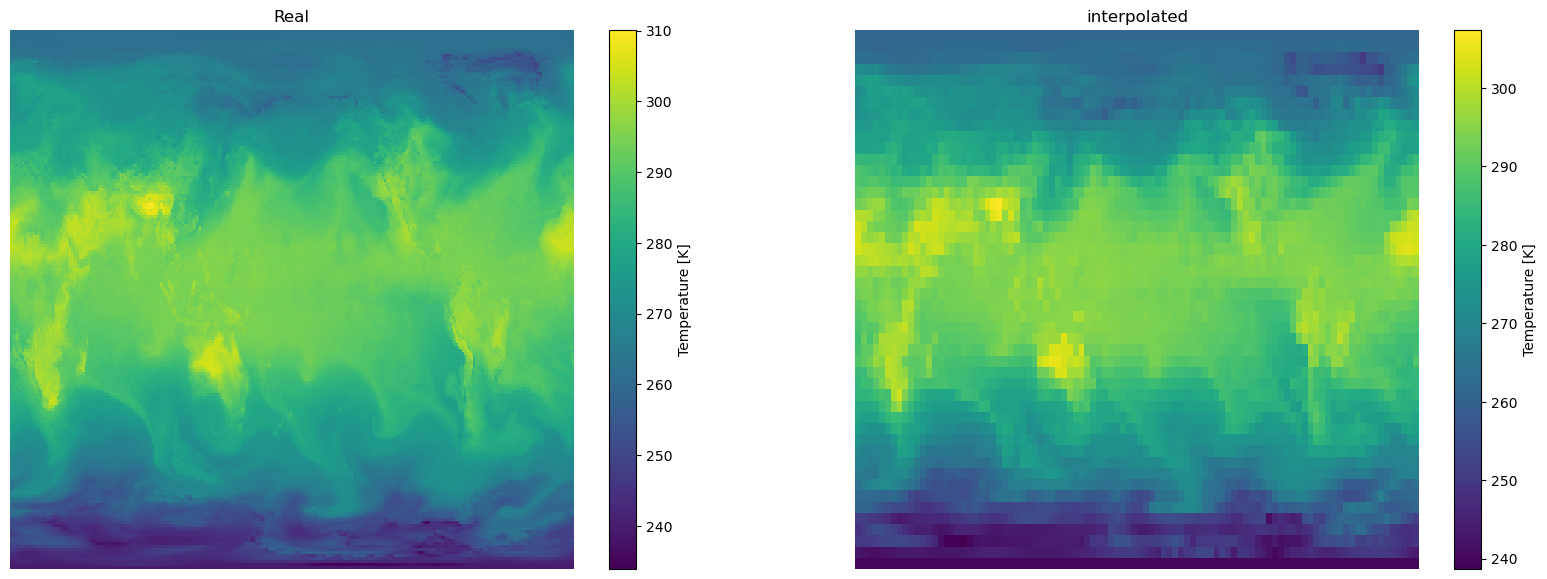

In [338]:
print('air')
nc_data_int = xr.load_dataset('./air_interpolated.nc')
nc_data = xr.load_dataset('./air.nc')
fig, axes = plt.subplots(ncols=2, figsize=(20,7))
for ax in axes.flat:
    ax.set_axis_off()
nc_data.t[3].plot(ax=axes[0])
nc_data_int.t.plot(ax=axes[1])
axes[1].set_title('interpolated')
axes[0].set_title('Real')
plt.show()

hgt


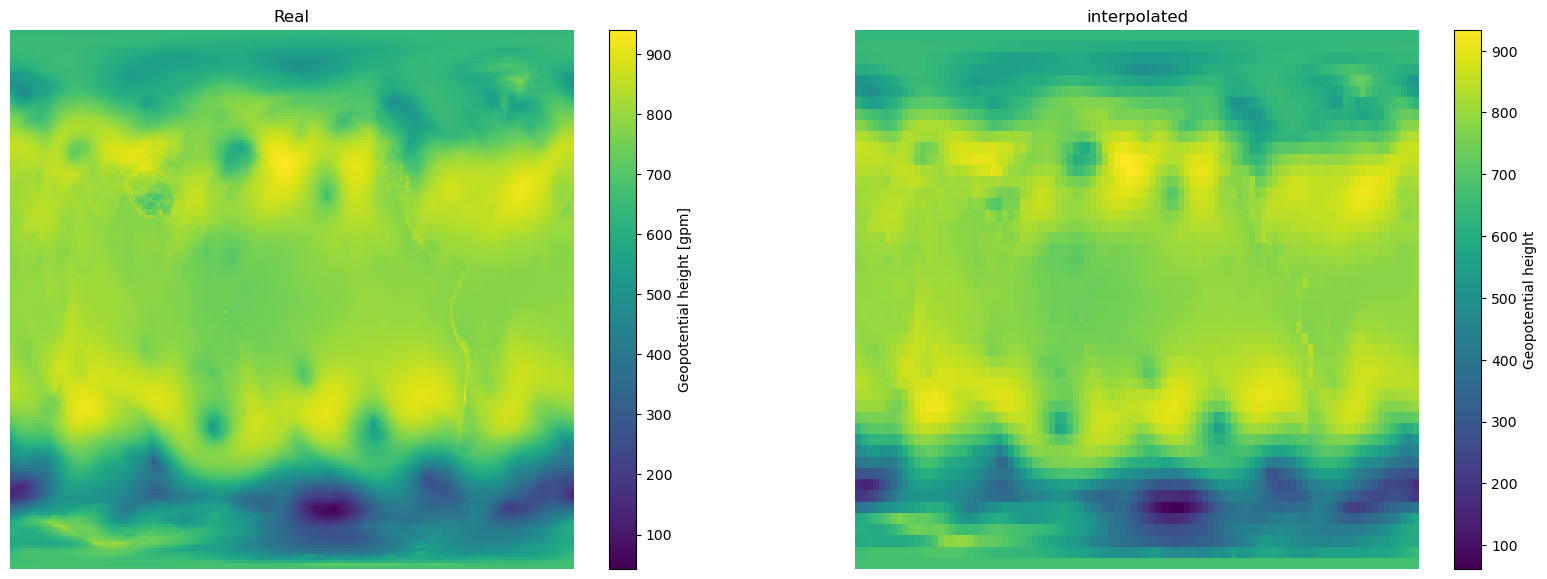

In [337]:
print('hgt')
nc_data_int = xr.load_dataset('./hgt_interpolated.nc')
nc_data = xr.load_dataset('./hgt.nc')
fig, axes = plt.subplots(ncols=2, figsize=(20,7))
for ax in axes.flat:
    ax.set_axis_off()
nc_data.gh[3].plot(ax=axes[0])
nc_data_int.gh.plot(ax=axes[1])
axes[1].set_title('interpolated')
axes[0].set_title('Real')
plt.show()

rhum


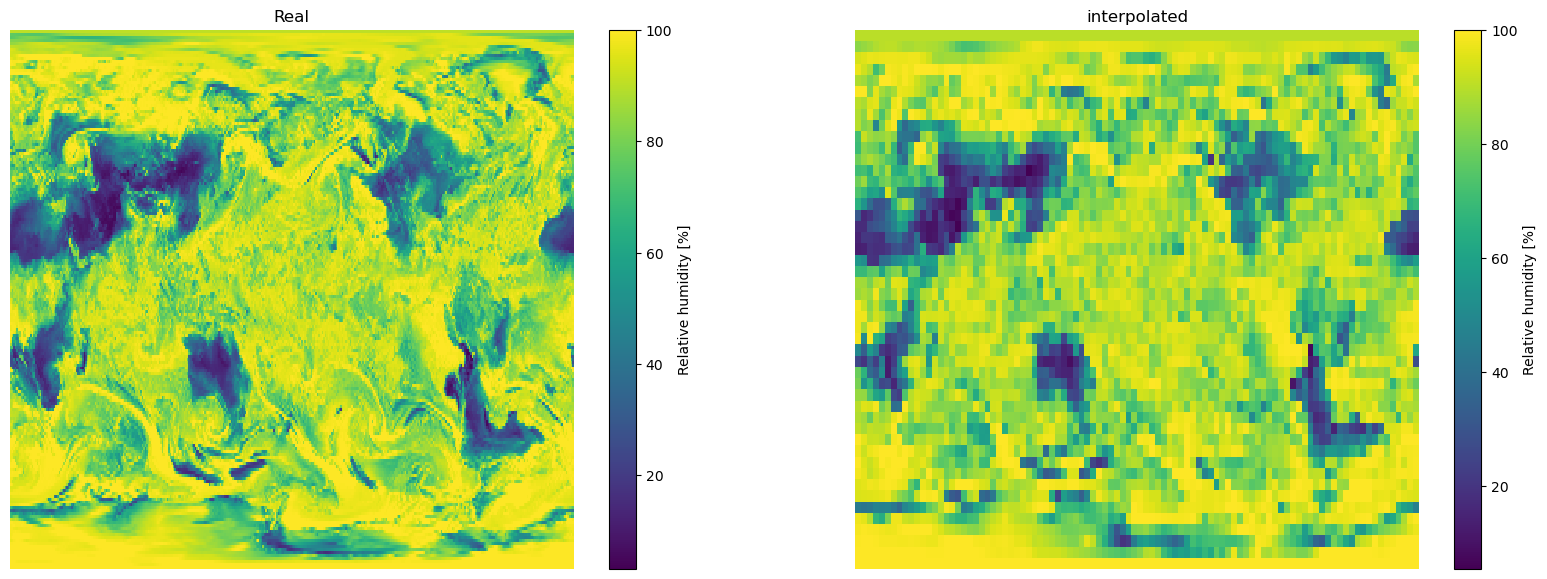

In [343]:
print('rhum')
nc_data_int = xr.load_dataset('./rhum_interpolated.nc')
nc_data = xr.load_dataset('./rhum.nc')
fig, axes = plt.subplots(ncols=2, figsize=(20,7))
for ax in axes.flat:
    ax.set_axis_off()
nc_data.r[3].plot(ax=axes[0])
nc_data_int.r.plot(ax=axes[1])
axes[1].set_title('interpolated')
axes[0].set_title('Real')
plt.show()

uwnd


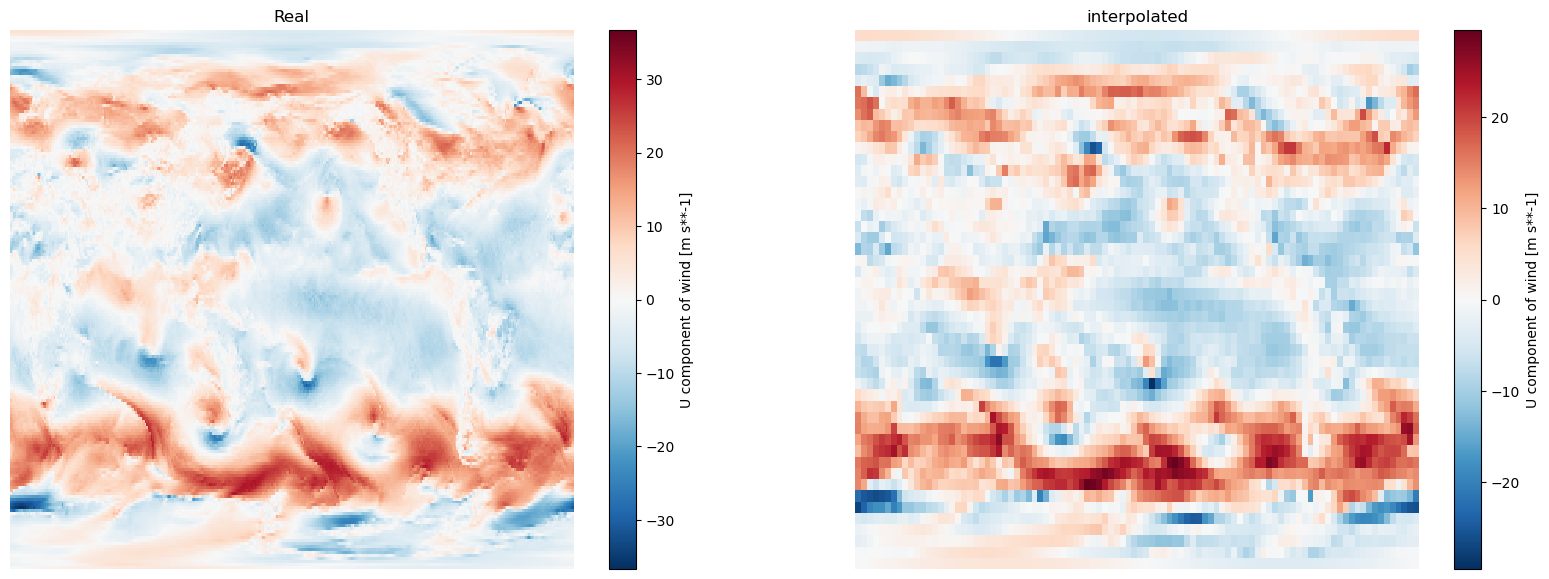

In [344]:
print('uwnd')
nc_data_int = xr.load_dataset('./uwnd_interpolated.nc')
nc_data = xr.load_dataset('./uwnd.nc')
fig, axes = plt.subplots(ncols=2, figsize=(20,7))
for ax in axes.flat:
    ax.set_axis_off()
nc_data.u[3].plot(ax=axes[0])
nc_data_int.u.plot(ax=axes[1])
axes[1].set_title('interpolated')
axes[0].set_title('Real')
plt.show()

vwnd


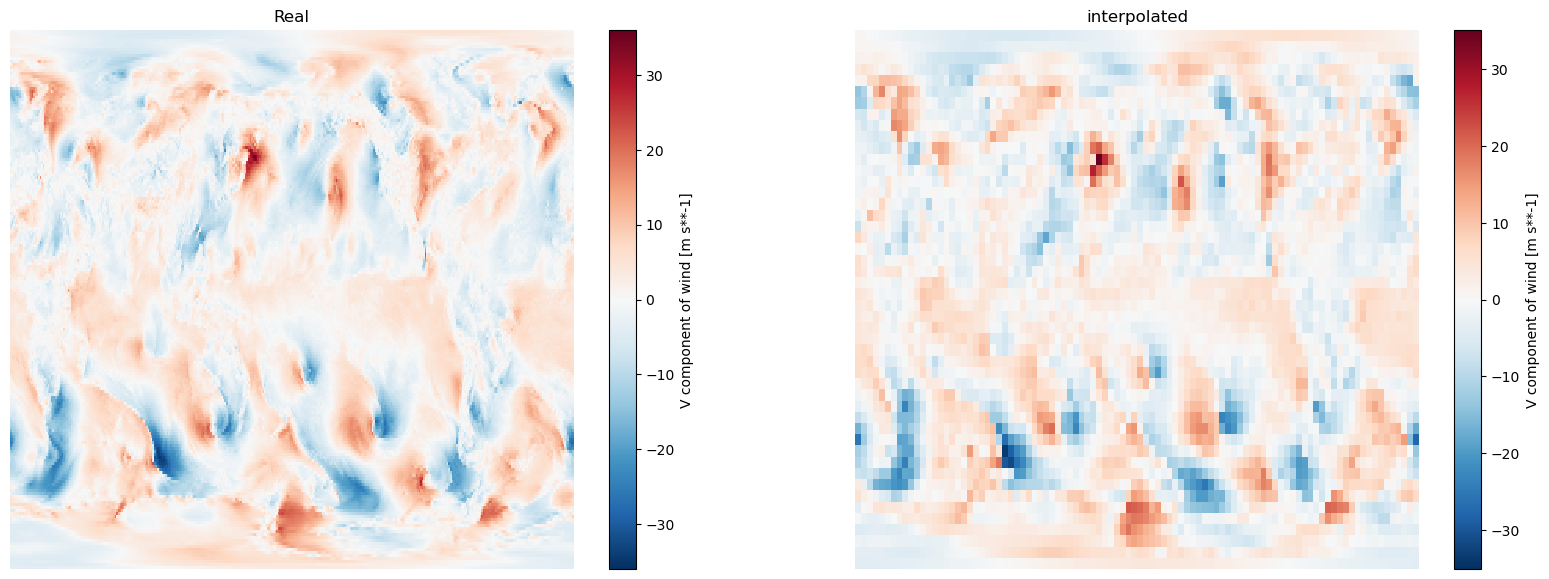

In [346]:
print('vwnd')
nc_data_int = xr.load_dataset('./vwnd_interpolated.nc')
nc_data = xr.load_dataset('./vwnd.nc')
fig, axes = plt.subplots(ncols=2, figsize=(20,7))
for ax in axes.flat:
    ax.set_axis_off()
nc_data.v[3].plot(ax=axes[0])
nc_data_int.v.plot(ax=axes[1])
axes[1].set_title('interpolated')
axes[0].set_title('Real')
plt.show()